You are given a list of bombs. The range of a bomb is defined as the area where its effect can be felt. This area is in the shape of a circle with the center as the location of the bomb.

The bombs are represented by a 0-indexed 2D integer array bombs where bombs[i] = [xi, yi, ri]. xi and yi denote the X-coordinate and Y-coordinate of the location of the ith bomb, whereas ri denotes the radius of its range.

You may choose to detonate a single bomb. When a bomb is detonated, it will detonate all bombs that lie in its range. These bombs will further detonate the bombs that lie in their ranges.

Given the list of bombs, return the maximum number of bombs that can be detonated if you are allowed to detonate only one bomb.

 

Example 1:

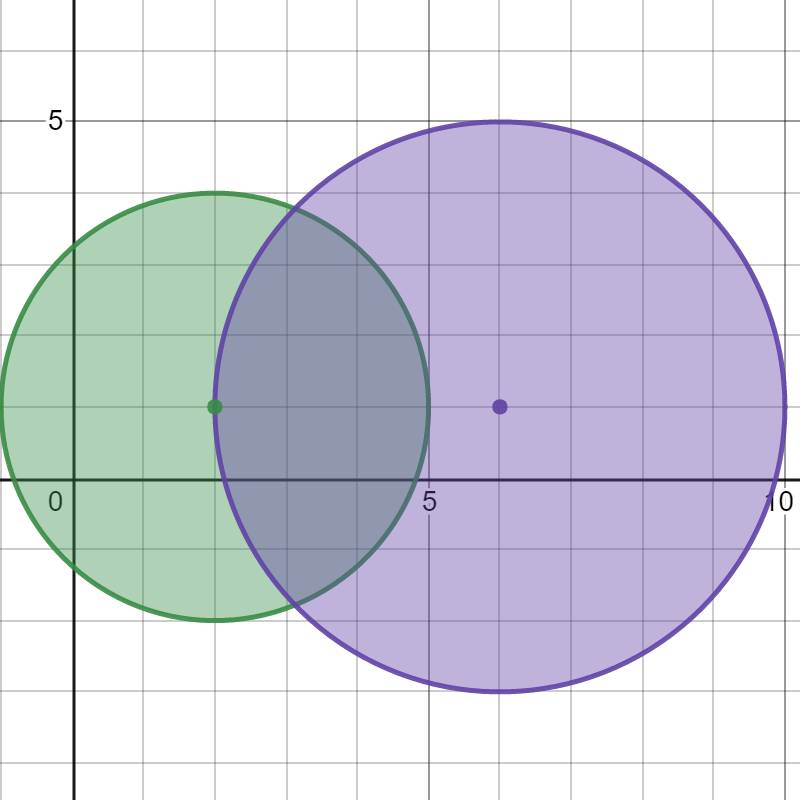

Input: bombs = [[2,1,3],[6,1,4]]
Output: 2
Explanation:
The above figure shows the positions and ranges of the 2 bombs.
If we detonate the left bomb, the right bomb will not be affected.
But if we detonate the right bomb, both bombs will be detonated.
So the maximum bombs that can be detonated is max(1, 2) = 2.

Example 2:

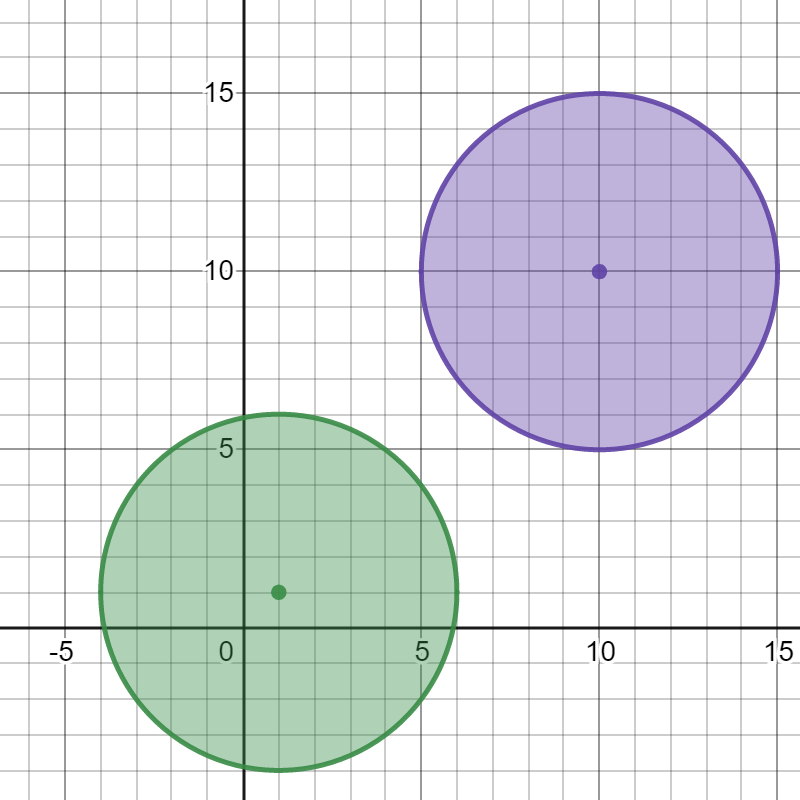

Input: bombs = [[1,1,5],[10,10,5]]
Output: 1
Explanation:
Detonating either bomb will not detonate the other bomb, so the maximum number of bombs that can be detonated is 1.

Example 3:

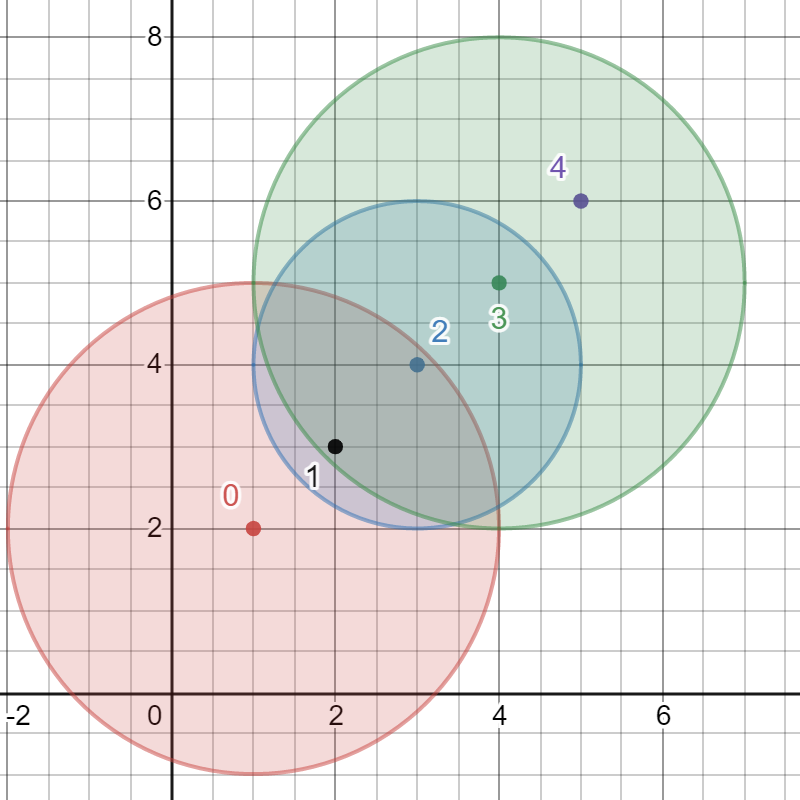

Input: bombs = [[1,2,3],[2,3,1],[3,4,2],[4,5,3],[5,6,4]]
Output: 5
Explanation:
The best bomb to detonate is bomb 0 because:
- Bomb 0 detonates bombs 1 and 2. The red circle denotes the range of bomb 0.
- Bomb 2 detonates bomb 3. The blue circle denotes the range of bomb 2.
- Bomb 3 detonates bomb 4. The green circle denotes the range of bomb 3.
Thus all 5 bombs are detonated.

 

Constraints:

    1 <= bombs.length <= 100
    bombs[i].length == 3
    1 <= xi, yi, ri <= 105



In [ ]:
def l2dist(xi, yi, xj, yj):
    return ((xi - xj)**2 + (yi - yj)**2) ** 0.5

class Solution:
    def maximumDetonation(self, bombs: List[List[int]]) -> int:
        graph = defaultdict(set)
        for i in range(len(bombs)):
            xi, yi, radiusi = bombs[i]
            for j in range(len(bombs)):
                if j != i:
                    xj, yj, _ = bombs[j]
                    if l2dist(xi, yi, xj, yj) <= radiusi:
                        graph[i].add(j)
        
        ans = 0
        for start in range(len(bombs)):
            visited = [False for _ in bombs]
            q = deque()
            q.append(start)
            while q:
                node = q.popleft()
                if not visited[node]:
                    visited[node] = True
                    q.extend(graph[node])

            ans = max(ans, sum(visited))
        return ans